# Student Grade Prediction Model

## Authors:
- Samuel Nicklaus
- Jacob Kindle
- Lane Swartzendruber
- Alejandro Mirafuentes

# Introduction

In this project, our team focuses on predicting a student's academic performance based on various personal, academic, and social factors using **classification**. We aim to classify students into different grade categories (A, B, C, etc.) based on inputs such as age, sex, high school type, participation in extracurricular activities, and more.

*Data Source*: [Here](https://www.kaggle.com/datasets/jacksondivakarr/student-classification-dataset?select=student.csv)

*Data Source Description (Via Kaggle):*

This dataset encompasses various aspects related to student performance. Each entry is uniquely identified by an 'Id'. The dataset includes demographic information such as 'Student_Age' and 'Sex'. 'High_School_Type' categorizes the type of high school attended, while 'Scholarship' indicates whether the student has a scholarship. Details about 'Additional_Work' and involvement in 'Sports_activity' provide insights into extracurricular commitments.

'Transportation' outlines the mode of commuting for each student. Academic aspects are captured through 'Weekly_Study_Hours', 'Attendance', and evaluations of 'Reading', 'Notes', and 'Listening_in_Class'. The culmination of these factors is reflected in the 'Grade' column, providing a comprehensive overview of student performance. This dataset serves as a valuable resource for exploring the multifaceted dynamics influencing academic outcomes.


In [13]:
# imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from sklearn import (datasets, neighbors,
                     naive_bayes,
                     model_selection as skms,
                     linear_model, dummy,
                     metrics,
                     pipeline,
                     preprocessing as skpre)
import ipywidgets as widgets
from ipywidgets import interact
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Data Description

- Student_Age: The age of the student.


- Sex: The gender of the student (e.g., Male, Female).


- High_School_Type: The type of high school the student attended (e.g., State, Private, Other).


- Scholarship: Information on whether the student received a scholarship (e.g., percentages indicating the scholarship amount).


- Additional_Work: Indicates whether the student has additional work or responsibilities outside of school (Yes/No).


- Sports_activity: Indicates whether the student participates in sports activities (Yes/No).


- Transportation: The mode of transportation used by the student to get to school (e.g., Bus, Private).


- Weekly_Study_Hours: The number of hours the student spends studying each week.


- Attendance: The regularity of the student's attendance (e.g., Always, Never).


- Reading: Indicates whether the student engages in reading activities outside of the required curriculum (Yes/No).


- Notes: Indicates whether the student takes notes during classes or while studying (Yes/No).


- Listening_in_Class: Indicates whether the student actively listens in class (Yes/No).


- Project_work: Indicates whether the student participates in project work (Yes/No).


- Grade: The grade the student received, which could be in a variety of formats (e.g., AA, BB, etc).

In [14]:
# Read in data, drop unneeded columns
df = pd.read_csv('student.csv')
df.drop(['Unnamed: 0', 'Id'], axis=1, inplace=True)
df.dropna(inplace=True)

df['Additional_Work'] = df['Additional_Work'].map({'Yes': 0, 'No' : 1})
df.drop(df[df['Attendance'] == '3'].index,inplace=True)
df['Sports_activity'] = df['Sports_activity'].map({'Yes': 1, 'No' : 0})
df['Listening_in_Class'] = df['Listening_in_Class'].map({'Yes': 1, 'No' : 0})
df['Project_work'] = df['Project_work'].map({'Yes': 1, 'No' : 0})
df['Notes'] = df['Notes'].map({'Yes': 2, 'No' : 0})
df['Reading'] = df['Reading'].map({'Yes': 1, 'No' : 0})
df['Sex'] = df['Sex'].map({'Male': 1, 'Female' : 0})
df['Transportation'] = df['Transportation'].map({'Private': 1, 'Bus' : 0})
df['Attendance'] = df['Attendance'].map({'Always': 2, 'Sometimes' : 1, 'Never' : 0})
df.head()

grade_mapping = {
    'AA': 'A', 'BA': 'B', 'BB': 'B', 'BC': 'B', 'CC': 'C', 'CB': 'C', 'DC': 'D', 'DD': 'D', 'Fail': 'F'
}
df['Grade'] = df['Grade'].map(grade_mapping)

ct = ColumnTransformer(
   [
       ('one-hot',OneHotEncoder(),['High_School_Type','Scholarship']),
       ('label-encoder',OrdinalEncoder(categories=[['A','B','C','D','F']]),['Grade'])
   ]
)

trf = ct.fit_transform(df)
names = ct.get_feature_names_out()
df_encoded = pd.DataFrame(trf,columns=names)
df_encoded
df = pd.concat([df,df_encoded],axis=1)
df.drop(columns=['High_School_Type','Scholarship'],inplace=True)
df.drop(columns=['Grade'],inplace=True)
df.rename(columns = {'label-encoder__Grade': 'Grade'},inplace=True)
df.dropna(inplace=True)

X = df.drop(columns=['Grade'])
y = df['Grade']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_validation, y_train, y_validation = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

df.head(5)

,Student_Age,Sex,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,one-hot__High_School_Type_Other,one-hot__High_School_Type_Private,one-hot__High_School_Type_State,one-hot__Scholarship_100%,one-hot__Scholarship_25%,one-hot__Scholarship_50%,one-hot__Scholarship_75%,Grade
0,21.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,21.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,18.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,22.0,1.0,1.0,0.0,0.0,12.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# Data Visualization

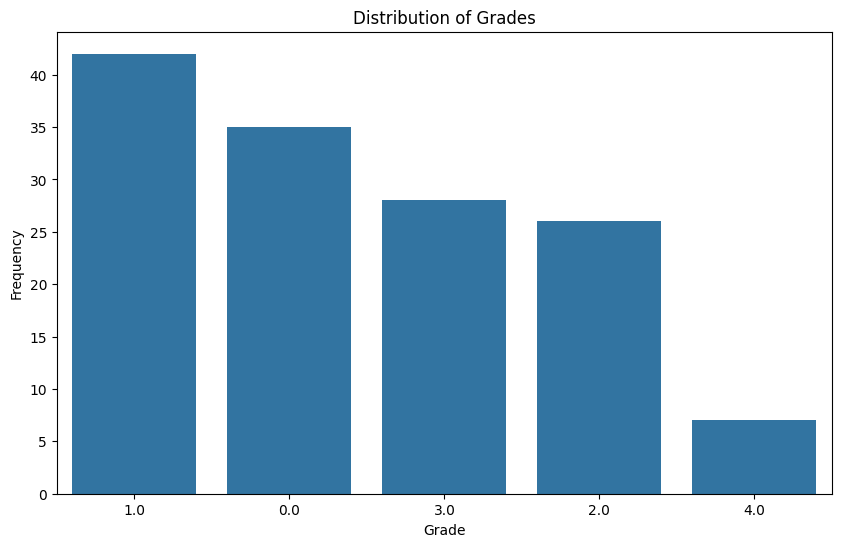

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Grade', order=df['Grade'].value_counts().index)
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()



# Training/validation

In [16]:
from itertools import combinations
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors, naive_bayes, metrics, ensemble

best_score = 0
best_model = None
best_features = None
models = [
    # {"name": "KNN-n=1", "model": neighbors.KNeighborsClassifier(n_neighbors=1)},
    # {"name": "KNN-n=2", "model": neighbors.KNeighborsClassifier(n_neighbors=2)},
    # {"name": "KNN-n=3", "model": neighbors.KNeighborsClassifier(n_neighbors=3)}, # These models did not outperform the other models
    # {"name": "KNN-n=4", "model": neighbors.KNeighborsClassifier(n_neighbors=4)},
    # {"name": "KNN-n=9", "model": neighbors.KNeighborsClassifier(n_neighbors=9)},
    {"name": f"RandomForest-n=10", "model": ensemble.RandomForestClassifier(n_estimators=10, max_depth=5)},
]
#  # Add various random forest models
# for n_estimators in [10, 50, 100, 200]:
#     models.append({"name": f"RandomForest-n={n_estimators}", "model": ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=5)})
    
feature_groups = {
    'Student_Age': ['Student_Age'],
    'Sex': ['Sex'],
    'Additional_Work': ['Additional_Work'],
    'Sports_activity': ['Sports_activity'],
    'Transportation': ['Transportation'],
    'Weekly_Study_Hours': ['Weekly_Study_Hours'],
    'Attendance': ['Attendance'],
    'Reading': ['Reading'],
    'Notes': ['Notes'],
    'Project_work': ['Project_work'],
    'Listening_in_Class': ['Listening_in_Class'],
    'High_School_Type': ['one-hot__High_School_Type_Other', 'one-hot__High_School_Type_Private', 'one-hot__High_School_Type_State'],
    'Scholarship': ['one-hot__Scholarship_100%', 'one-hot__Scholarship_75%', 'one-hot__Scholarship_50%', 'one-hot__Scholarship_25%'],
}
# Iterating through each model
for model in models:
    # Trying every combination of feature groups
    for L in range(1, len(feature_groups) + 1):
        for subset in combinations(feature_groups.keys(), L):
            selected_features = [feature for group in subset for feature in feature_groups[group]]
            # Selecting the subset of features
            X_train_sub = X_train[selected_features]
            X_validation_sub = X_validation[selected_features]
                
            # Fitting the model
            fit = model['model'].fit(X_train_sub, y_train)
            predictions = fit.predict(X_validation_sub)
            score = metrics.accuracy_score(y_validation, predictions)
            # Updating the best score and best model if this model is better
            if score > best_score:
                print(score, model['name'], selected_features)
                best_score = score
                best_model = model['name']
                best_features = selected_features

print(f"Best Model: {best_model}\nBest Score: {best_score}\nBest Features: {best_features}")

0.42857142857142855 RandomForest-n=10 ['Student_Age']
0.5 RandomForest-n=10 ['Student_Age', 'Sex']
0.5357142857142857 RandomForest-n=10 ['Additional_Work', 'Transportation']
Best Model: RandomForest-n=10
Best Score: 0.5357142857142857
Best Features: ['Additional_Work', 'Transportation']


In [17]:
X_test_sub = X_test[selected_features]
X_train_sub = X_train[selected_features]
                
# Fitting the model
fit = model['model'].fit(X_train_sub, y_train)
predictions = fit.predict(X_test_sub)
score = metrics.accuracy_score(y_test, predictions)
print(f"Test Score: {score}")


Test Score: 0.39285714285714285
